
# Diseño de software

----

### Unidad 3: Covertura de código

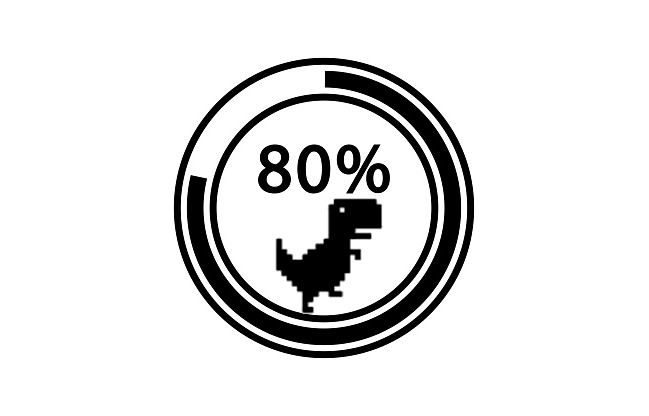


## Problemas con el testeo

- Es muy fácil escribir tests que no hagan nada (de hecho podemos escribir 100 funciones vacias y mostrar que los tests pasan)
- La cobertura de código es una medida (porcentual) en las pruebas de software que mide el grado en que el código fuente de un programa ha sido comprobado.
- Es una forma indirecta de calcular la calidad de un test.
- Aun asi puede engañarse al coverage.

## Coverage.py

Coverage.py es una herramienta para medir la cobertura de código de los programas Python. Monitorea su programa, observando qué partes del código se han ejecutado, luego analiza la fuente para identificar el código que podría haberse ejecutado pero que no.

La medición de cobertura generalmente se usa para medir la efectividad de las pruebas. Puede mostrar qué partes de su código están siendo ejercitadas por las pruebas y cuáles no.

https://coverage.readthedocs.io

In [3]:
!pip install coverage pytest-cov

  Using cached coverage-5.5-cp39-cp39-manylinux2010_x86_64.whl (243 kB)
  Using cached pytest_cov-2.12.1-py2.py3-none-any.whl (20 kB)


## Vamos con un ejemplo básico

In [ ]:
# contenido  test_cov.py
def division(a, b):
    return a / b
def sum(a, b):
    return a + b
def test_division():
    assert division(1, 2) == .5
def test_sum():
    assert sum(1, 2) == 3
if __name__ == "__main__":
    test_division()
    test_sum()

In [6]:
!coverage run 04_code_coverage_code/test_cov.py
!coverage report -m

Name                                Stmts   Miss  Cover   Missing
-----------------------------------------------------------------
04_code_coverage_code/test_cov.py      10      0   100%
-----------------------------------------------------------------
TOTAL                                  10      0   100%


## Integrandolo con pytest

In [7]:
!pytest -v 04_code_coverage_code/test_cov.py --cov test_cov --cov-fail-under 90 --cov-report term-missing

============================= test session starts ==============================
platform linux -- Python 3.9.7, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/juan/proyectos/dis_ssw/bin/python
cachedir: .pytest_cache
rootdir: /home/juan/proyectos/dis_ssw/src/unidad2
plugins: cov-2.12.1, anyio-3.3.0
collecting ... 
collected 2 items                                                              

04_code_coverage_code/test_cov.py::test_division PASSED                  [ 50%]
04_code_coverage_code/test_cov.py::test_sum PASSED                       [100%]

----------- coverage: platform linux, python 3.9.7-final-0 -----------
Name                                Stmts   Miss  Cover   Missing
-----------------------------------------------------------------
04_code_coverage_code/test_cov.py      10      0   100%
-----------------------------------------------------------------
TOTAL                                  10      0   100%

Required test coverage of 90% reached. Total coverage: 100.

In [8]:
!coverage report -m

Name                                Stmts   Miss  Cover   Missing
-----------------------------------------------------------------
04_code_coverage_code/test_cov.py      10      0   100%
-----------------------------------------------------------------
TOTAL                                  10      0   100%


## Tipos de Cobertura
- **Cobertura de líneas**: Líneas de código ejecutadas
- **Cobertura de ramas**: Decisiones (if/else, switch) ejecutadas en ambas direcciones
- **Cobertura de funciones**: Funciones llamadas
- **Cobertura de condiciones**: Condiciones booleanas evaluadas como true y false

## Complejidad Ciclomática
- Mide la complejidad contando caminos linealmente independientes
- Relacionada con la dificultad de crear prueba y mantenimiento que tengan alto **CC**

## Límites de la Cobertura
- Alta cobertura ≠ Ausencia de errores
- Posibilidad de errores lógicos aún con 100% de cobertura

## Paradoja del Pesticida

Acuñada por *Boris Beizer*, establece que:
> al igual que los pesticidas gradualmente pierden su efectividad contra las plagas, los conjuntos de pruebas de software tienden a perder su capacidad para encontrar nuevos defectos con el tiempo.

- Cuando se ejecuta repetidamente el mismo conjunto de pruebas, eventualmente llega un punto en que estas pruebas ya no encuentran nuevos errores. Esto no necesariamente significa que el software esté libre de defectos, sino que se ha vuelto "inmune" a ese conjunto particular de pruebas.
- Los errores más obvios y fáciles de detectar se encuentran y corrigen primero.
- El software se adapta para pasar las pruebas existentes (usar `a = b if something else c`.
- Los desarrolladores aprenden a evitar los tipos de errores que las pruebas actuales pueden detectar.

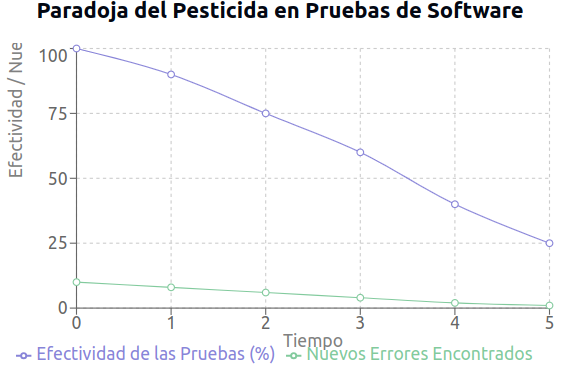


## Paradoja del Pesticida - Implicaciones:

El riesgo de una falsa sensación de seguridad si se confía demasiado en un conjunto estático de pruebas.


### Soluciones?:

- Rotar y variar los conjuntos de pruebas regularmente (nadie lo hace).
- Implementar técnicas de prueba exploratorias (Siguiente tema).
- Utilizar generación automática de casos de prueba (Siguiente tema)
- Incorporar pruebas basadas en mutaciones (Siguiente + 1 tema).
- Realizar revisiones de código y pruebas manuales además de las automatizadas (se hace).


### Relación con otros conceptos:

- Se relaciona con el principio de "pesticide resistance" en biología.
- Tiene paralelismos con el concepto de "overfitting" en machine learning.

##  Cobertura MC/DC (Cobertura Modificada de Condición/Decisión).

Es un criterio de cobertura de código muy riguroso que se utiliza principalmente en sistemas críticos de seguridad, como software aeroespacial o de control de tráfico aéreo.

**Objetivo principal:**

> Asegurar que cada condición en una decisión afecte independientemente el resultado de esa decisión.

- Detecta errores sutiles en lógica compleja.
- Reduce significativamente el número de casos de prueba en comparación con la cobertura de todas las combinaciones posibles.
- Requiere un análisis más profundo del código.
- Puede ser difícil de alcanzar en sistemas muy complejos.
- Necesita herramientas especializadas para su medición y análisis.
- Es un requisito en estándares como DO-178B/C para software de aviación crítico para la seguridad.

##  Cobertura MC/DC (Cobertura Modificada de Condición/Decisión).

**Pasos:**

- Cada punto de entrada y salida en el programa ha sido invocado.
- Cada condición en una decisión ha tomado todos los posibles resultados.
- Cada decisión en el programa ha tomado todos los posibles resultados.
- Cada condición en una decisión ha sido mostrada para afectar independientemente el resultado de la decisión.

**Ejemplo práctico:**
   Consideremos la expresión: `(A and B) or C`
   
   Para satisfacer MC/DC, necesitaríamos los siguientes casos de prueba:
   
```
   A  B  C  | Resultado
   ----------------
   T  T  F  | T
   T  F  F  | F  (muestra el efecto independiente de B)
   F  T  F  | F  (muestra el efecto independiente de A)
   F  F  T  | T  (muestra el efecto independiente de C)
   ```

## El Efecto Hawthorne en testing de software


> Es el fenómeno donde los desarrolladores modifican su comportamiento (generalmente mejorándolo) cuando saben que su trabajo está siendo observado o medido, en este caso, a través de métricas de cobertura de código.

- El nombre proviene de los estudios de Hawthorne Works de Western Electric en los años 1920 y 1930, donde se observó que la productividad de los trabajadores mejoraba temporalmente cuando sabían que estaban siendo estudiados.

- Los desarrolladores tienden a escribir código más cuidadosamente cuando saben que se está midiendo la cobertura.
- Pueden añadir más pruebas unitarias o mejorar las existentes para aumentar los porcentajes de   cobertura.
- Podrían prestar más atención a las áreas del código que saben que serán evaluadas.
- Fomento de mejores prácticas de codificación y pruebas.

**Contras**

- Enfoque excesivo en métricas de cobertura en lugar de la calidad real de las pruebas.
- Posible "gaming" del sistema, escribiendo pruebas solo para aumentar la cobertura sin mejorar realmente la calidad.
- Estrés adicional para los desarrolladores que se sienten constantemente observados.

## El Efecto Hawthorne en testing de software

**Para la gestión de proyectos:**

- Necesidad de equilibrar la medición de métricas con otros indicadores de calidad.
- Importancia de crear una cultura de pruebas positiva, no punitiva.
- Consideración de cómo y cuándo comunicar las métricas de cobertura al equipo.

**Estrategias para aprovechar el Efecto Hawthorne positivamente:**

- Usar la medición de cobertura como una herramienta educativa, no solo evaluativa.
- Fomentar la revisión por pares y la discusión abierta sobre estrategias de prueba.
- Hay premiar no solo altos porcentajes de cobertura, sino también pruebas bien diseñadas y efectivas.

**Relación con otros conceptos:**

- Se relaciona con el concepto de "gamificación" en el desarrollo de software.
- Tiene paralelismos con el "Observer Effect" en física, donde el acto de observar un fenómeno lo altera.

## Cerrando

- El coverage fracasa rapido si no siguen bien PEP-8 y PEP-20
- Es una métrica, tomenla como tal.
- Coverage siempre >= 80%

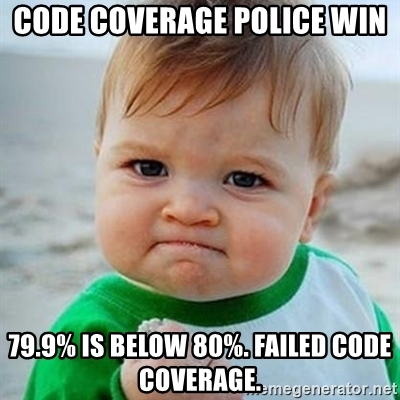